In [1]:
#imports
import uproot as ur
import awkward as ak
import numpy as np

import os
os.environ['CUDA_VISIBLE_DEVICES'] = "2" #specify GPU
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf

# energyflow imports
import energyflow as ef
from energyflow.archs import PFN
from energyflow.utils import data_split

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
import graph_util as gu
import plot_util as pu

In [3]:
file = np.load('./nndata_kd.npz')

In [4]:
X_all = file['arr_0']
Y_all = file['arr_1']
eta = file['arr_2']
X_glob = file['arr_3']

In [6]:
model = tf.keras.models.load_model('./w6_pfn_bigtest.hdf5')

In [7]:
#rerun in order to examine 'best' model (this was produced in a different notebook)
(X_train, X_val, X_test, Y_train, Y_val, Y_test, X_glob_tr, X_glob_val, X_glob_te, eta_train, eta_val, eta_test) = data_split(X_all, Y_all, X_glob, eta, val=100000, test=300000)

In [8]:
max(abs(eta))

2.999977

In [10]:
#concatenate the Xs:
X_tr = [X_train, X_glob_tr]
X_vali = [X_val, X_glob_val]
X_te = [X_test, X_glob_te]

#define the different eta regions
selec_01 = abs(eta_test) < 0.1
selec_02 = (abs(eta_test) >= .1) & (abs(eta_test) < .2)
selec_03 = (abs(eta_test) >= .2) & (abs(eta_test) < .3)
selec_04 = (abs(eta_test) >= .3) & (abs(eta_test) < .4)
selec_05 = (abs(eta_test) >= .4) & (abs(eta_test) < .5)
selec_06 = (abs(eta_test) >= .5) & (abs(eta_test) < .6)
selec_07 = (abs(eta_test) >= .6) & (abs(eta_test) < .7)
selec_08 = (abs(eta_test) >= .7) & (abs(eta_test) < .8)
selec_09 = (abs(eta_test) >= .8) & (abs(eta_test) < .9)
selec_10 = (abs(eta_test) >= .9) & (abs(eta_test) < 1.)
selec_11 = (abs(eta_test) >= 1.) & (abs(eta_test) < 1.1)
selec_12 = (abs(eta_test) >= 1.1) & (abs(eta_test) < 1.2)
selec_13 = (abs(eta_test) >= 1.2) & (abs(eta_test) < 1.3)
selec_14 = (abs(eta_test) >= 1.3) & (abs(eta_test) < 1.4)
selec_15 = (abs(eta_test) >= 1.4) & (abs(eta_test) < 1.5)
selec_16 = (abs(eta_test) >= 1.5) & (abs(eta_test) < 1.6)
selec_17 = (abs(eta_test) >= 1.6) & (abs(eta_test) < 1.7)
selec_18 = (abs(eta_test) >= 1.7) & (abs(eta_test) < 1.8)
selec_19 = (abs(eta_test) >= 1.8) & (abs(eta_test) < 1.9)
selec_20 = (abs(eta_test) >= 1.9) & (abs(eta_test) < 2.)
selec_21 = (abs(eta_test) >= 2.) & (abs(eta_test) < 2.1)
selec_22 = (abs(eta_test) >= 2.1) & (abs(eta_test) < 2.2)
selec_23 = (abs(eta_test) >= 2.2) & (abs(eta_test) < 2.3)
selec_24 = (abs(eta_test) >= 2.3) & (abs(eta_test) < 2.4)
selec_25 = (abs(eta_test) >= 2.4) & (abs(eta_test) < 2.5)
selec_26 = (abs(eta_test) >= 2.5) & (abs(eta_test) < 2.6)
selec_27 = (abs(eta_test) >= 2.6) & (abs(eta_test) < 2.7)
selec_28 = (abs(eta_test) >= 2.7) & (abs(eta_test) < 2.8)
selec_29 = (abs(eta_test) >= 2.8) & (abs(eta_test) < 2.9)
selec_30 = (abs(eta_test) >= 2.9) & (abs(eta_test) < 3.)
selec_all = abs(eta_test) <= 3. 

selections = [selec_01, selec_02, selec_03, selec_04, selec_05, selec_06, selec_07, selec_08, selec_09, selec_10,
              selec_11, selec_12, selec_13, selec_14, selec_15, selec_16, selec_17, selec_18, selec_19, selec_20,
              selec_21, selec_22, selec_23, selec_24, selec_25, selec_26, selec_27, selec_28, selec_29, selec_30,
              selec_all]

#make metrics
X_1, X_2 = X_te
fps = []
tps = []
threshss = []
aucs = []
for selection in selections:
    X_interm = [X_1[selection], X_2[selection]]
    preds = model.predict(X_interm, batch_size=1000) 
    pfn_fp, pfn_tp, threshs = roc_curve(Y_test[selection][:,1], preds[:,1])

    fps.append(pfn_fp)
    tps.append(pfn_tp)
    threshss.append(threshs)

    # get area under the ROC curve
    auc = roc_auc_score(Y_test[selection][:,1], preds[:,1])
    aucs.append(auc)
    print('PFN AUC:', auc)


PFN AUC: 0.9784397297098885
PFN AUC: 0.9826594319289673
PFN AUC: 0.9808012325757001
PFN AUC: 0.9818189338637457
PFN AUC: 0.9784478058741314
PFN AUC: 0.9780770116577154
PFN AUC: 0.9794875319591722
PFN AUC: 0.9776805860150235
PFN AUC: 0.9772855804923846
PFN AUC: 0.974802632391444
PFN AUC: 0.9769473135129443
PFN AUC: 0.9750126624091611
PFN AUC: 0.9711575826953573
PFN AUC: 0.9581560660213619
PFN AUC: 0.9207323992716967
PFN AUC: 0.9287146788753687
PFN AUC: 0.9487927124955712
PFN AUC: 0.9396165470199315
PFN AUC: 0.9388531565092348
PFN AUC: 0.9383997300970451
PFN AUC: 0.9476055402144247
PFN AUC: 0.9520168549249163
PFN AUC: 0.9566195528788548
PFN AUC: 0.9582740578777112
PFN AUC: 0.9560688854960503
PFN AUC: 0.9678816079534805
PFN AUC: 0.9879246698490043
PFN AUC: 0.9879927424367811
PFN AUC: 0.9860005015091625
PFN AUC: 0.9862611835988252
PFN AUC: 0.9655514348901669


In [14]:
eta_ranges = np.arange(0., 3.1, .1)+.05

Text(0, 0.5, 'AUC')

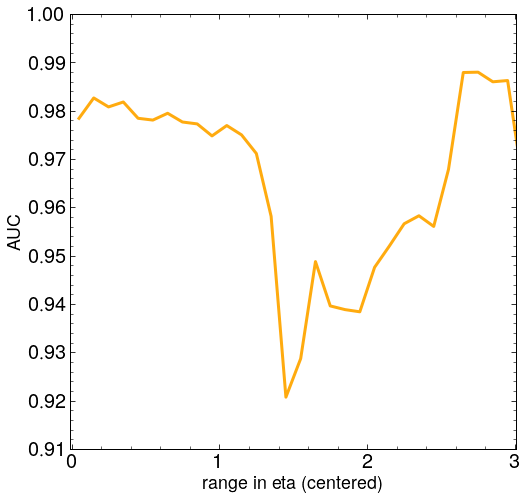

In [16]:
plt.figure(figsize=[8,8])
plt.xlim(-.01, 3.01)
plt.plot(eta_ranges, aucs, linewidth=3, c='xkcd:yellowish orange')
plt.xlabel('range in eta (centered)')
plt.ylabel('AUC')

In [17]:
from scipy.interpolate import interp1d

In [19]:
f = []
for i in range(len(fps)):
    f.append(interp1d(tps[i], 1/fps[i]))


<ipython-input-19-fc7eb20c9f55>:3: RuntimeWarning: divide by zero encountered in true_divide
  f.append(interp1d(tps[i], 1/fps[i]))


In [21]:
reg95 = []
for i in range(len(f)):
    reg95.append(f[i](.95))

Text(0, 0.5, 'Rejection at 95% efficiency')

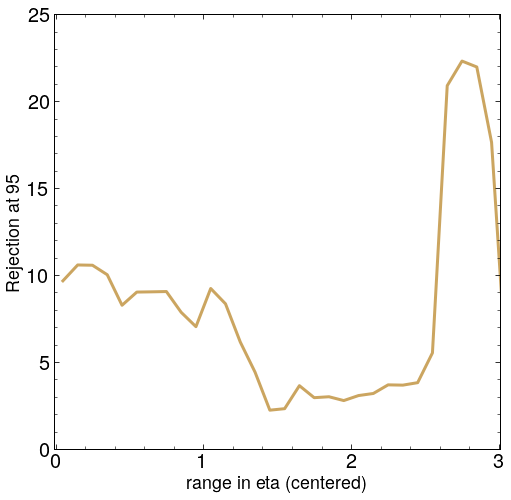

In [24]:
plt.figure(figsize=[8,8])
plt.xlim(-.01, 3.01)
plt.plot(eta_ranges, reg95, linewidth=3, c='xkcd:sand brown')
plt.xlabel('range in eta (centered)')
plt.ylabel('Rejection at 95% efficiency')


In [5]:
#this is a model WITHOUT the global features!! run this, then compare to the one WITH global features. See if including it helps!
def modelNmetrics_noglob(X_cell, Y, eta, epochs, batch_size, val_size, test_size):
    #run the model & create the metrics
    
    Phi_sizes, F_sizes = (100, 100, 128), (100, 100, 100)
    print('sizes: X ', len(X_cell), 'Y: ', len(Y), 'test:', test_size)
    
    # do train/val/test split 
    (X_train, X_val, X_test, Y_train, Y_val, Y_test, eta_train, eta_val, eta_test) = data_split(X_cell, Y, eta, val=val_size, test=test_size)
    print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)
    
    #make the model:
    pfn = PFN(input_dim=X_cell.shape[-1], Phi_sizes=Phi_sizes, F_sizes=F_sizes)#, num_global_features =1)
    
    #try callbacks:
    callback = tf.keras.callbacks.ModelCheckpoint('./w6_pfn4.hdf5', save_best_only=True)
    
    # train model
    history = pfn.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, Y_val), verbose=1, callbacks=[callback])
    
    #define the different eta regions
    selec_l07 = abs(eta_test) < 0.7
    selec_b0714 = (abs(eta_test) >= .7) & (abs(eta_test) < 1.4)
    selec_b1425 = (abs(eta_test) >= 1.4) & (abs(eta_test) < 2.5)
    selec_b2531 = (abs(eta_test) >= 2.5) & (abs(eta_test) < 3.1) #max eta is 3 so!!
    selec_all = abs(eta_test) <= 3.1 
    
    selections = [selec_l07, selec_b0714, selec_b1425, selec_b2531, selec_all]
    
    #load up best model
    best = tf.keras.models.load_model('./w6_pfn_noglob.hdf5')
    
    #make metrics
    fps = []
    tps = []
    threshss = []
    aucs = []
    for selection in selections:
        preds = best.predict(X_test[selection], batch_size=1000) 
        pfn_fp, pfn_tp, threshs = roc_curve(Y_test[selection][:,1], preds[:,1])
        
        fps.append(pfn_fp)
        tps.append(pfn_tp)
        threshss.append(threshs)
        
        # get area under the ROC curve
        auc = roc_auc_score(Y_test[selection][:,1], preds[:,1])
        aucs.append(auc)
        print('PFN AUC:', auc)
   
    return history, fps, tps, aucs, selections

In [ ]:
history_nog, fp_nog, tp_nog, auc_nog, selecs_nog = modelNmetrics_noglob(X_all, Y_all, eta, 100, 1000, 100000, 300000)

sizes: X  780000 Y:  780000 test: 300000
(380000, 2000, 4) (100000, 2000, 4) (300000, 2000, 4) (380000, 2) (100000, 2) (300000, 2)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 4)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 100)    500         input[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, None, 100)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 100)    10100    